In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
titanic_df = pd.read_csv("./data_pd/Titanic3-Dataset.csv")
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [42]:
# Filtering the dataframe by Sex = male
male_df = titanic_df[titanic_df['Sex'] == 'male']
male_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [43]:
mean = male_df['Age'].mean()
median = male_df['Age'].median()
mode = male_df['Age'].mode()
print(f'Mean value : {mean}')
print(f'Median value : {median}')
print(f'Mode value : {mode}')

Mean value : 30.72664459161148
Median value : 29.0
Mode value : 0    19.0
1    25.0
2    28.0
Name: Age, dtype: float64


In [38]:
male_df['Age'].fillna(mean)

0      22.000000
4      35.000000
5      30.726645
6      54.000000
7       2.000000
         ...    
883    28.000000
884    25.000000
886    27.000000
889    26.000000
890    32.000000
Name: Age, Length: 577, dtype: float64

In [ ]:

n = male_df.Age.count()  
q1 = (25/100)*(n+1)
q3 = (75/100)*(n+1)
ls = male_df.sort_values(by='Age', ascending=True)['Age'].to_list()

Q1 = ls[int(q1) - 1]
Q3 = ls[int(q3) - 1]

IQR = Q3 - Q1
print(f"Q1 is {Q1}, Q3 is {Q3} and IQR is {IQR}")

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = [x for x in ls if x < lower_bound or x > upper_bound]

print("lower_bound: ", lower_bound)
print("upper_bound: ", upper_bound)
print("Arrays: ", ls)
print("Outliers: ", outliers)

Q1 is 21.0, Q3 is 39.0 and IQR is 18.0
lower_bound:  -6.0
upper_bound:  66.0
Arrays:  [0.42, 0.67, 0.83, 0.83, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0, 7.0, 7.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 10.0, 11.0, 11.0, 11.0, 12.0, 14.0, 14.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.5, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.5, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0

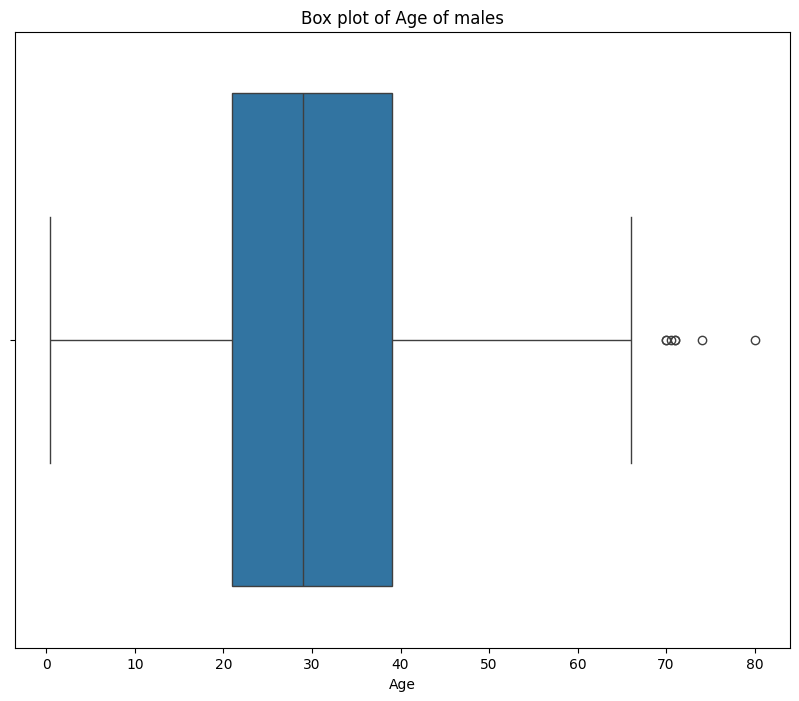

In [40]:
plt.figure(figsize=(10,8))
sns.boxplot(data=male_df['Age'], orient='h')
plt.title('Box plot of Age of males')
plt.xlabel('Age')
plt.show()